<sub>Felix Becker, Lars Gabriel University of Greifswald, Germany</sub>
# Exercise Set 1 - 1

The potential of machine learning ultimatively comes from pattern detection in large amounts of data. However, before we can train a model and make predictions, we have to:
 - Analyse the raw data (which filetypes, how is the data organized?)
 - Read data file(s) into memory
 - Make statistical analyses (e.g. plots)  
 - Manipulate the data (reshape and mathematical operations), remove, add or combine features
 
## Raw data

Inspect the file *bikes-summerdays-full.csv*. How many datapoints and attributes are there? What delimiter is used? Has the file one or more header rows? Are there missing values?

*Tip: Double clicking the file in jupyter opens a CSVTable view. You can also open the file as raw text by right clicking $\rightarrow$ Open With $\rightarrow$ Editor.*  
Yet another alternative is to use `less` and `wc` on the command line in the terminal.

## Read the file



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In the cell below, read the data file as a pandas dataframe called ``df``. Take care to handle the header line of the file correctly and use the right delimiter/separator.

In [2]:
df = pd.read_csv("bikes-summerdays-full.csv", sep = ";") #YOUR TASK: choose a correct separator with the "sep" argument

Print the following things:
- What is the shape of the dataframe?
- What are the datatypes of the columns "season" and "temp"?
- What is the maximum and minimum temperature?

Remember that `df` is a [pandas dataframe](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) and that you can use class member functions to solve the task. Alternatively, you could also apply numpy functions to numeric columns. Useful functions are `np.min` and `np.max`.

In [3]:
## YOUR CODE HERE
## play around with the dataframe and complete the tasks above
print(df.shape)
print(df.dtypes)
print(df.temp.min(), df.temp.max())

(10886, 12)
datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object
0.82 41.0


The dataset contains dates that are rather useless if stored as strings:

In [4]:
df["datetime"]

0        2011-01-01 00:00:00
1        2011-01-01 01:00:00
2        2011-01-01 02:00:00
3        2011-01-01 03:00:00
4        2011-01-01 04:00:00
                ...         
10881    2012-12-19 19:00:00
10882    2012-12-19 20:00:00
10883    2012-12-19 21:00:00
10884    2012-12-19 22:00:00
10885    2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: object

The following cell will convert *datetime* to a proper time format that allows the extraction of hours, days and month. If the following cell prints an error message, go back and make sure you chose the correct separator character.

In [5]:
df["datetime"] = pd.DatetimeIndex(df["datetime"])
df["hour"] = [t.hour for t in df["datetime"]]
df["dayofweek"] = [t.dayofweek for t in df["datetime"]]
df["month"] = [t.month for t in df["datetime"]]

## Getting warm: Simple statistical analyses

The original data came with a [description for each data column](https://www.kaggle.com/datasets/marklvl/bike-sharing-dataset). Lets assume we don't have this description and want to find out what the encoding 1,2,3,4 for "season" means. 

- Print (a subset of) the values from the "season" column
- Use the helper function below to create boxplots for the temperatures of the 4 seasons and make a guess which number corresponds to which season.

*Tips (assuming X,Y are vectors of the same size):*
- *``X == i`` returns a boolean vector that has "true" on each position that matches i.*
- *use ``Y[X == i]`` (boolean mask) to retrieve subsets*

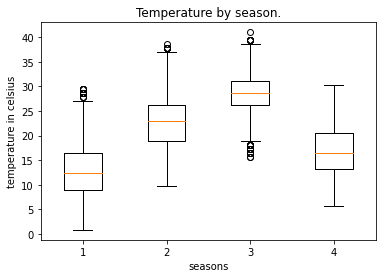

In [6]:
# expects data to be a list of length 4, where entry i is a np.array of temperatures for season i
def boxplots(data):
    fig, ax = plt.subplots()
    ax.set_title("Temperature by season.")
    ax.set_xlabel("seasons")
    ax.set_ylabel("temperature in celsius")
    ax.boxplot(data)
    
# YOUR CODE STARTS
data = [df["temp"][df["season"] == i] for i in range(1,5)]
# YOUR CODE ENDS

boxplots(data)

## Feature engineering: Create a datamatrix

Most of the time, the raw data that we read from a file is not sufficient to be directly fed to a ML model. Usually we do:
- normalize continuous variables (in some form) 
- one hot represent discrete variables
- apply other transformations, for example we could guess that both for very low and very high temperatures fewer bikes are rented so that the square of the temperature might be useful

*Note that the last point becomes less important with modern deep learning as in principal non-linear models could learn these transformations on their own.*

Create a `np.matrix` $X$ of datatype float with the following columns:
- workingday, holiday
- normalized: windspeed, humidity, temp, atemp
- squares of temp and atemp
- one hot represented (!) weather and season
- hour, dayofweek, month (normalized to (0,1], e.g. lunch time at 12am should map to 0.5)

A **one hot representation** for example of the four seasons would map season $2$ to the vector $[0,0,1,0].$

*Tip: Use the functions `to_one_hot` and `normalize`*

In [7]:
m = df.shape[0] #number of datapoints
n = 2 #number of attributes 19

X = np.zeros((m, n)) # initialize with all zeros

#assumes that classes is a vector of length m with elements in range 0,1,...,num_classes-1
#returns a matrix of shape (m, num_classes)
def to_one_hot(classes, num_classes):
    return np.eye(num_classes)[classes]

#assumes that X is a vector, returns a normalized X
def normalize(X):
    return (X - np.mean(X)) / np.std(X)

#example:
X[:,0] = df["workingday"]

# YOUR CODE STARTS
# add the remaining columns X[:,1], X[:,2], ...
X[:,1] = df["holiday"]
#X[:,2] = normalize(df["windspeed"])
#X[:,3] = normalize(df["humidity"])
#X[:,4] = normalize(df["temp"])
#X[:,5] = normalize(df["atemp"])
#X[:,6] = X[:,4]**2
#X[:,7] = X[:,5]**2
#X[:,8:12] = to_one_hot(df["weather"]-1, np.unique(df["weather"]).size)
#X[:,12:16] = to_one_hot(df["season"]-1, np.unique(df["season"]).size)
#X[:,16] = df["hour"] / 24
#X[:,17] = df["dayofweek"] / 7
#X[:,18] = df["month"] / 12
# YOUR CODE ENDS

X

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [8]:
#save X to a (binary) file and use it later in another notebook
np.save("X", X)
#for convenience, also save y
y = df["count"]
np.save("y", y)

We will use $X$ later to train a neural network.

In Python *numpy* is usually used to transfer numeric data between frameworks e.g. it allows communication of *pandas* and *tensorflow*.

## Fit a multivariate regression model

Fitting a linear regression model on our prepared data using high-level keras is very easy. Read and execute the code below and see it happening.

In [9]:
import tensorflow as tf

In [12]:
#construct the model which is just ja single Dense layer with 1 output unit
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units = 1))

#here we use the popular Adam optimizer (a variant of stochastic gradient descent)
#it's typically a very good choice for a broad range of problems
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.1)

#we compile the model and tell the framework to use mean squared error
model.compile(optimizer=optimizer, loss="mse")

#fit the model for 10 epochs (i.e. each datapoint is seen 10 times) on 80% of the data
#test the models performance on the other 20% of the data
shuffled_indices = np.arange(X.shape[0])
np.random.shuffle(shuffled_indices)
X = X[shuffled_indices]
y = y[shuffled_indices]

history = model.fit(x=X, y=y, epochs=10, validation_split=0.2)

Epoch 1/10
273/273 [==============================] - 1s 2ms/step - loss: 62057.9062 - val_loss: 53674.1641
Epoch 2/10
273/273 [==============================] - 0s 2ms/step - loss: 50257.6719 - val_loss: 44319.6641
Epoch 3/10
273/273 [==============================] - 0s 842us/step - loss: 43005.6641 - val_loss: 38808.4727
Epoch 4/10
273/273 [==============================] - 0s 1ms/step - loss: 38884.8242 - val_loss: 35803.3164
Epoch 5/10
273/273 [==============================] - 1s 2ms/step - loss: 36676.3945 - val_loss: 34262.9219
Epoch 6/10
273/273 [==============================] - 0s 2ms/step - loss: 35588.1016 - val_loss: 33544.9922
Epoch 7/10
273/273 [==============================] - 0s 2ms/step - loss: 35052.4805 - val_loss: 33167.0742
Epoch 8/10
273/273 [==============================] - 0s 2ms/step - loss: 34731.5625 - val_loss: 32927.4570
Epoch 9/10
273/273 [==============================] - 0s 2ms/step - loss: 34495.5117 - val_loss: 32734.6699
Epoch 10/10
273/273 [=====

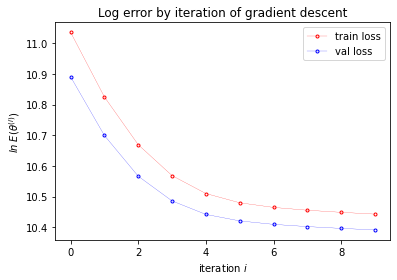

In [13]:
def plot_error(err, label, col="red"):
    ''' Plot error over time'''
    plt.plot(np.log(err), 'o-', color=col, linewidth=.2, markersize=3, mfc='none', label=label)
    plt.title("Log error by iteration of gradient descent")
    plt.xlabel('iteration '+r'$i$')
    plt.ylabel(r'$ln \;E(\theta^{(i)})$');
    
plt.subplots()
plot_error(history.history["loss"], label="train loss")
plot_error(history.history["val_loss"], col="blue", label="val loss")
plt.legend()

Of course, that is just the beginning:

- From linear regression, what other model choices do I have?
- What if I have data that has not a simple table-form like sequences or images?
- How do I correctly select between different models?
- How do I customize things like the loss function?
- How do I customize the behavior of the optimizer?
- What can I do if:
    - The trained model is not better than the baseline?
    - The training is too slow?
    - Nothing seems to be learned at all, the loss does not shrink?
    - My training loss is much lower than the test loss?